### import library ###

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Read data ###
pandas를 이용하여 data를 불러왔습니다.

In [83]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### train.head ###
- train.head()로 상위 5개의 data를 불러옵니다.
- test.head()로 test data를 확인했습니다. 


In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### columns  ###
- train dataset의 열에 해당하는 정보를 불러옵니다.

In [86]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### describe ###
- describe() 함수는 data의 columns 별 통계량을 가져옵니다.

In [87]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
print("train : ", train.shape, ", test : ", test.shape)

train :  (891, 12) , test :  (418, 11)


### Check the Null data ###
- info 함수를 사용해서 null data를 확인했습니다.
- train data에 age, cabin, Embarked에 해당하는 정보 중 NaN가 있음을 확인했습니다.

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- test data에는 Age, Fare, Cabin에 NaN이 있음을 확인했습니다.

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


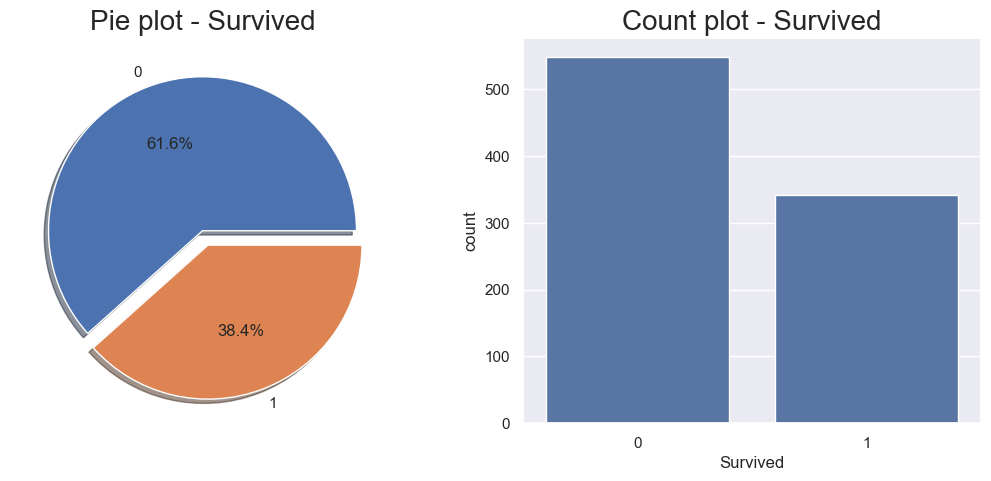

In [91]:
f, ax = plt.subplots(1, 2, figsize=(13, 5))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived', fontsize = 20)
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=train, ax=ax[1])
sns.set(font_scale = 0.3)
ax[1].set_title('Count plot - Survived', fontsize = 20)

plt.show()


- pclass에 따른 생존률을 확인했습니다.

- 더 좋은 class가 생존률이 좋은 것을 확인할 수 있습니다.

In [92]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [93]:
pd.crosstab(train['Pclass'], train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- pclass에 대한 data one-hot encoding합니다.

In [94]:
Pclass_train = pd.get_dummies(train["Pclass"])
Pclass_test = pd.get_dummies(train["Pclass"])

Pclass_train.columns = ["pclass_1", "pclass_2", "pclass_3"]
Pclass_test.columns = ["pclass_1", "pclass_2", "pclass_3"]

train.drop(["Pclass"], axis = 1, inplace = True)
test.drop(["Pclass"], axis = 1, inplace = True)

train = train.join(Pclass_train)
test = test.join(Pclass_test)

In [95]:
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True


### 성별에 따른 데이터 encoding
- 여성의 생존률이 더 높음을 알 수 있습니다.

In [96]:
sex_train = pd.get_dummies(train["Sex"])
sex_test = pd.get_dummies(train["Sex"])

sex_train.columns = ["Female", "Male"]
sex_test.columns = ["Female", "Male"]

train.drop(["Sex"], axis = 1, inplace = True)
test.drop(["Sex"], axis = 1, inplace = True)

train = train.join(sex_train)
test = test.join(sex_test)

In [97]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3,Female,Male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,True


- Age와 Cabin은 null data가 많아 데이터를 제거했습니다.

In [98]:
train = train.drop(["Age"], axis = 1)
test = test.drop(["Age"], axis = 1)

In [99]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

In [100]:
train.head()

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked,pclass_1,pclass_2,pclass_3,Female,Male
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,S,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,S,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,S,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,S,False,False,True,False,True


### family ###
- sibsp와 parch를 Family로 통합시킵니다
- 1은 본인입니다.

In [101]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1 

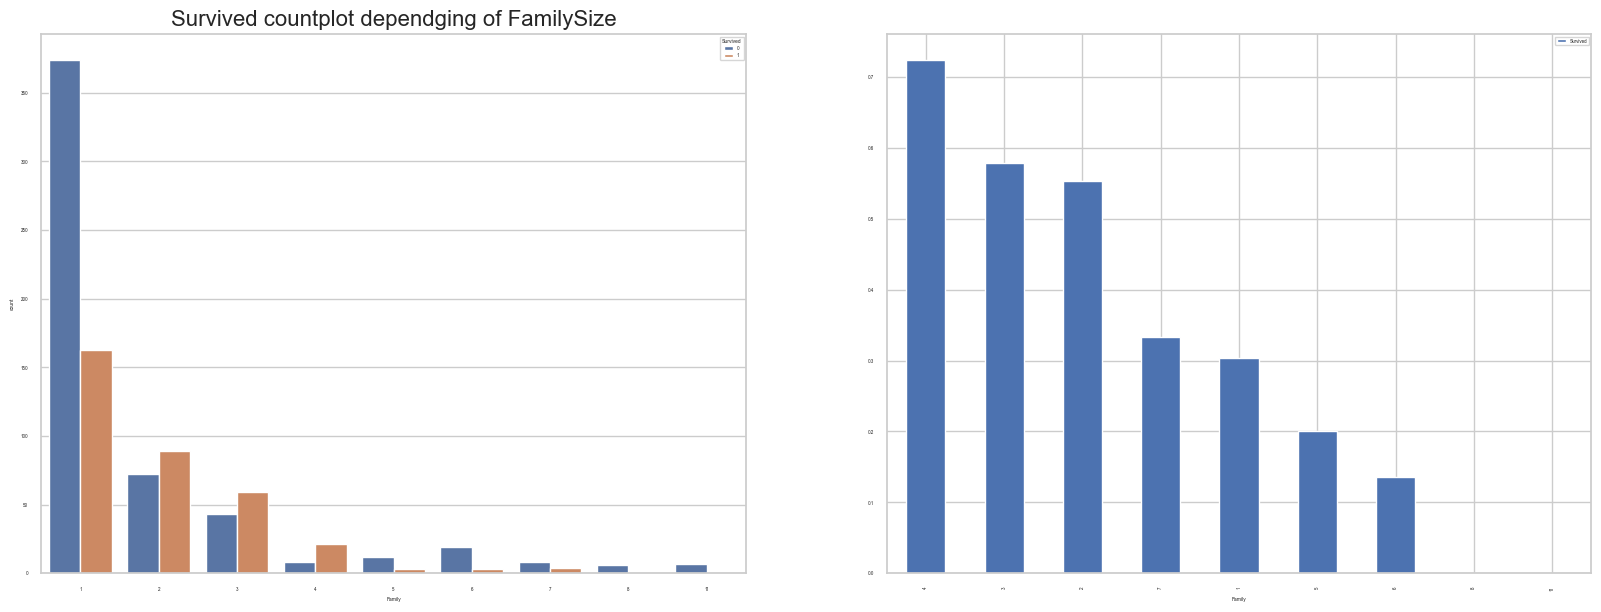

In [105]:
f, ax = plt.subplots(1, 2, figsize = (20,7))

sns.countplot(x="Family", hue = "Survived", data = train, ax = ax[0])
ax[0].set_title("Survived countplot dependging of FamilySize", fontsize = 16)

train[["Family", "Survived"]].groupby(["Family"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax[1])



plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

- 탑승료에 따른 생존률도 확인합니다.

/var/folders/b4/z8z0lpj9297652hwm6wyx9xr0000gn/T/ipykernel_47019/1620019031.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)


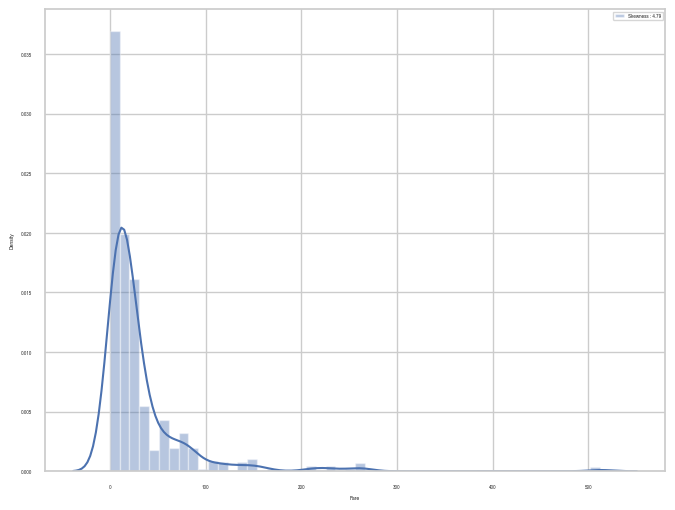

In [106]:
f, ax = plt.subplots(1, 1, figsize = (8,6))

g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

- 확률분포가 비대칭적이라 삭제합니다.

In [107]:
train = train.drop(["Fare"], axis = 1)
test = test.drop(["Fare"], axis = 1)

- Embarked에 따른 생존률도 확인합니다.

<Axes: xlabel='Embarked'>

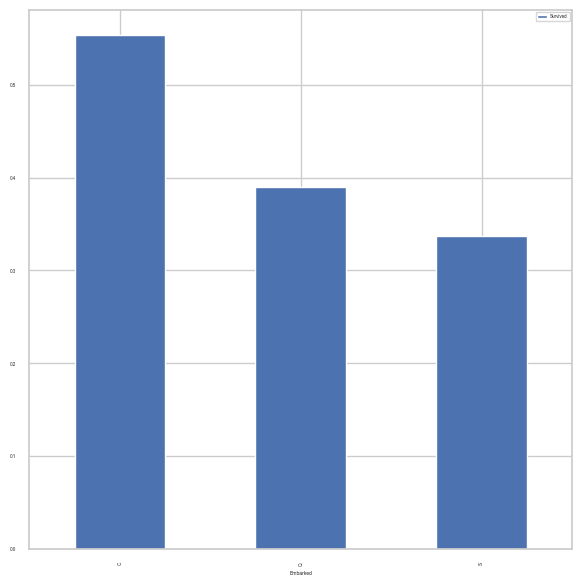

In [108]:
f, ax = plt.subplots(1, 1, figsize = (7,7))

train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax)

- null data는 탑승객이 제일많은 S로 채우고 encoding합니다.

In [109]:
train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

/var/folders/b4/z8z0lpj9297652hwm6wyx9xr0000gn/T/ipykernel_47019/3489979348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Embarked"].fillna("S", inplace = True)
/var/folders/b4/z8z0lpj9297652hwm6wyx9xr0000gn/T/ipykernel_47019/3489979348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [110]:
embarked_train = pd.get_dummies(train["Embarked"])
embarked_test = pd.get_dummies(train["Embarked"])

embarked_train.columns = ["embarked_s", "embarked_c", "embarked_q"]
embarked_test.columns = ["embarked_s", "embarked_c", "embarked_q"]

train.drop(["Embarked"], axis = 1, inplace = True)
test.drop(["Embarked"], axis = 1, inplace = True)

train = train.join(embarked_train)
test = test.join(embarked_test)

In [111]:
train.head()

,PassengerId,Survived,Name,SibSp,Parch,Ticket,pclass_1,pclass_2,pclass_3,Female,Male,Family,embarked_s,embarked_c,embarked_q
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,False,False,True,False,True,2,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,True,False,False,True,False,2,True,False,False
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,False,False,True,True,False,1,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,True,False,False,True,False,2,False,False,True
4,5,0,"Allen, Mr. William Henry",0,0,373450,False,False,True,False,True,1,False,False,True
